In [1]:
%load_ext autoreload
%autoreload 1
import numpy as np
import scipy.special as special
import scipy.integrate as integrate
import matplotlib.pyplot as plt
# fake beta function
def special_beta(alpha, beta): return special.gamma(alpha)*special.gamma(beta)/special.gamma(alpha+beta)

In [2]:
import eko.dglap as dglap
import eko.interpolation as interpolation
%aimport eko.dglap
%aimport eko.interpolation

In [3]:
def plot_dist(x,y,yref):
    """compare to distributions both in linear and logarithmic x-space"""
    plt.figure(figsize=(15,5))
    plt.subplot(2,3,1)
    plt.title("small x")
    plt.semilogx(x,y,"o")
    plt.semilogx(x,yref,"x")
    plt.subplot(2,3,4)
    plt.loglog(x,np.abs((y - yref)/yref),"x")
    plt.subplot(2,3,2)
    plt.title("linear x")
    plt.plot(x,y,"o")
    plt.plot(x,yref,"x")
    plt.subplot(2,3,5)
    plt.semilogy(x,np.abs((y - yref)/yref),"x")
    oMx = 1.0 - x
    ax = plt.subplot(2,3,3)
    ax.set_xlim(1e-3,.1)
    plt.title("large x, i.e. small (1-x)")
    plt.loglog(oMx,y,"o")
    plt.loglog(oMx,yref,"x")
    ax = plt.subplot(2,3,6)
    ax.set_xlim(1e-2,.5)
    plt.loglog(oMx,np.abs((y - yref)/yref),"x")
    plt.xlabel("1-x")

In [4]:
toy_xgrid = np.array([1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,.1,.3,.5,.7,.9])
def toy_uv0(x):
    return 5.107200 * x**(0.8-1.0) * (1. - x)**3

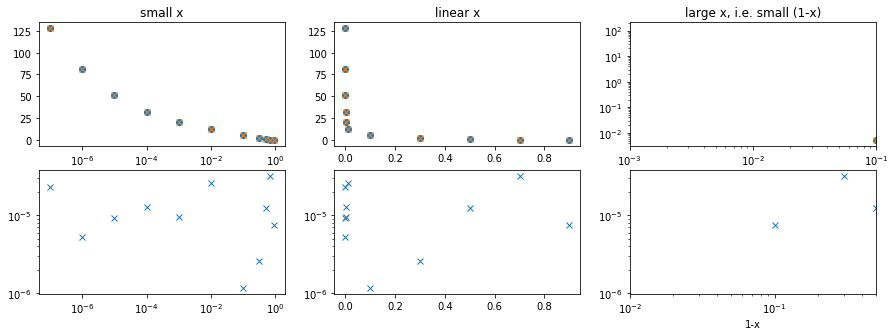

In [5]:
toy_uv0_grid = np.array([toy_uv0(x) for x in toy_xgrid])
toy_uv0_grid_ref = np.array([1.2829e-5,8.0943e-5,5.1070e-4,3.2215e-3,2.0271e-2,1.2448e-1,5.9008e-1,6.6861e-1,3.6666e-1,1.0366e-1,4.6944e-3])
plot_dist(toy_xgrid,toy_uv0_grid,toy_uv0_grid_ref/toy_xgrid)

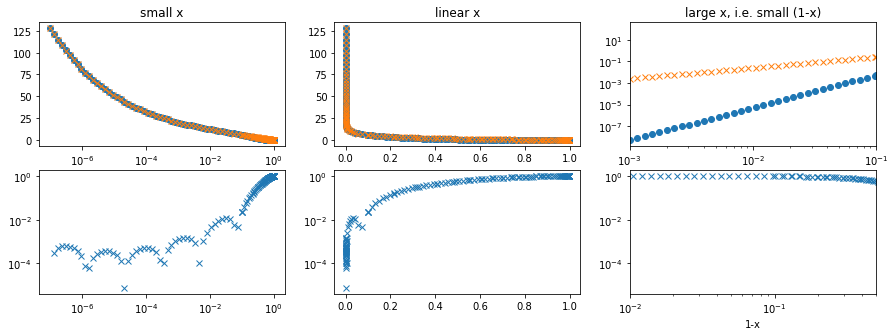

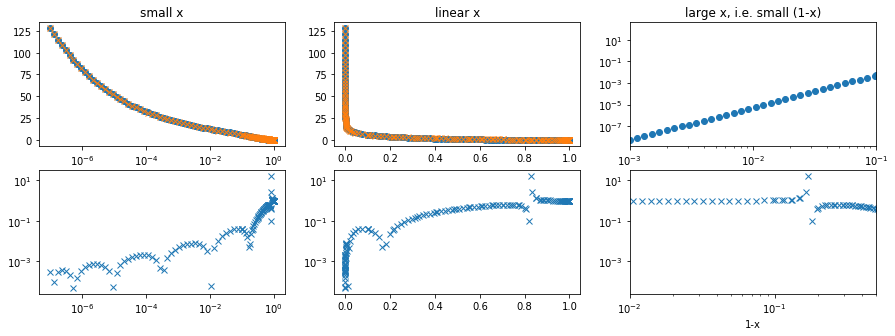

In [6]:
# [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1.0])
def plot_interpolation(f,g,xmin=1e-6):
    """plot f(x) and its interpolation obtained by n grid points"""
    n = len(g)
    fs = [f(x) for x in g]
    p = lambda xx: np.sum([fs[j] * interpolation.get_Lagrange_interpolators_log_x(xx,g,j) for j in range(n)])
    oMx = 1.0 - np.logspace(-3,np.log10(.9))
    xs = np.append(np.logspace(np.log10(xmin),-1),[np.linspace(0.1,.9),oMx])
    xs = np.sort(xs)
    ys = np.array([f(x) for x in xs])
    yps = np.array([p(x) for x in xs])
    plot_dist(xs,ys,yps)
plot_interpolation(toy_uv0,interpolation.get_xgrid_linear_at_log(7,1e-7),1e-7)
plot_interpolation(toy_uv0,interpolation.get_xgrid_Chebyshev_at_log(7,1e-7),1e-7)

In [7]:
ret1 = dglap.run_dglap({
    "PTO": 0,
    'alphas': 0.35,
    'Qref': np.sqrt(2),
    'Q0': np.sqrt(2),
    'NfFF': 4,

    "xgrid_size": 10,
    "targetgrid": toy_xgrid,
    "Q2grid": [1e4]
})

In [8]:
toy_uv1_xgrid = np.array([toy_uv0(x) for x in ret1["xgrid"]])
toy_uv1_grid = np.dot(ret1["operators"]["NS"],toy_uv1_xgrid)
toy_uv1_grid_ref = np.array([5.7722e-5,3.3373e-4,1.8724e-3,1.0057e-2,5.0392e-2,2.1955e-1,5.7267e-1,3.7925e-1,1.3476e-1,2.3123e-2,4.3443e-4])

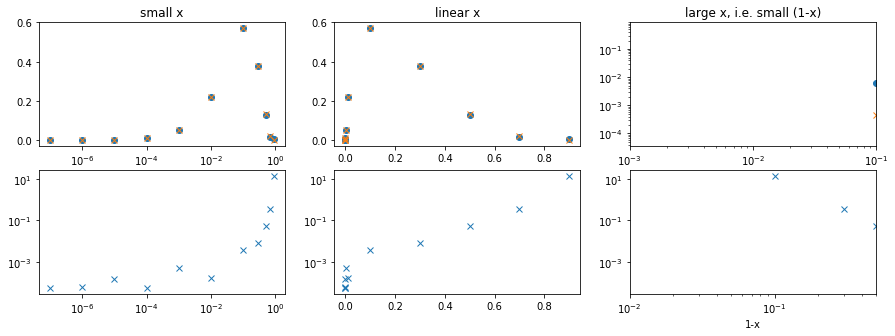

In [9]:
plot_dist(toy_xgrid,toy_xgrid*toy_uv1_grid,toy_uv1_grid_ref)